In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [2]:
geo_data = pd.read_excel('geo.xlsx')

In [3]:
geo_data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [5]:
X = geo_data[['x', 'y']]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

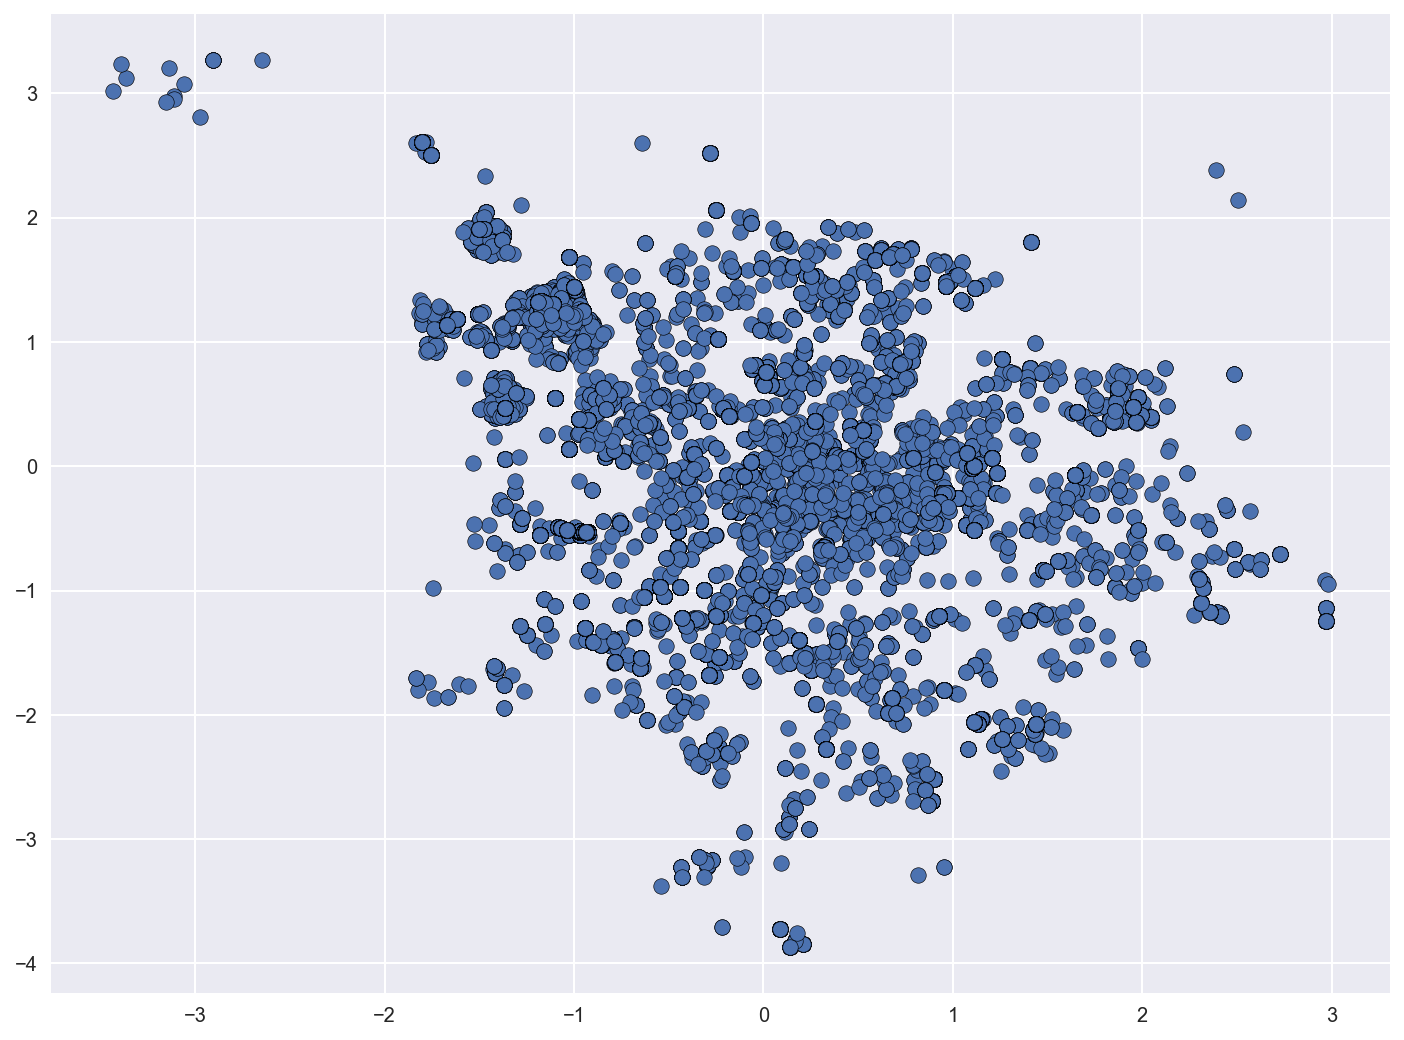

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='summer', s=60, edgecolors='black')

In [10]:
print(X_scaled.shape)

(108806, 2)


In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

In [12]:
k_inertia = []
ks = range(1,10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, random_state=0)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

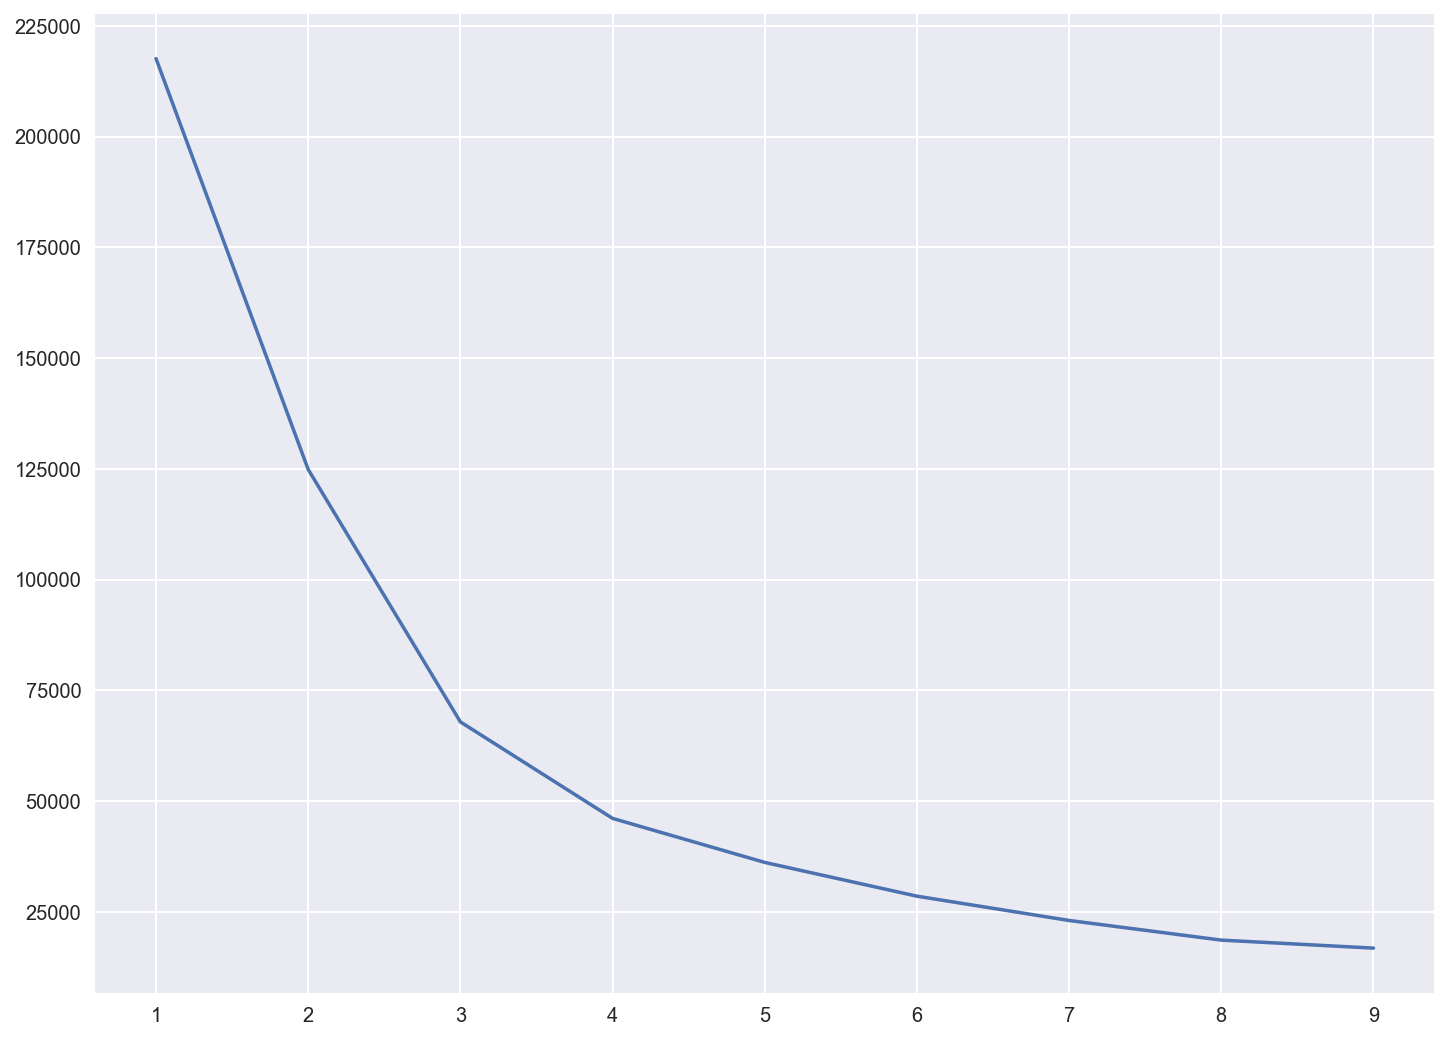

In [13]:
plt.plot(ks, k_inertia)

In [14]:
diff = np.diff(k_inertia)

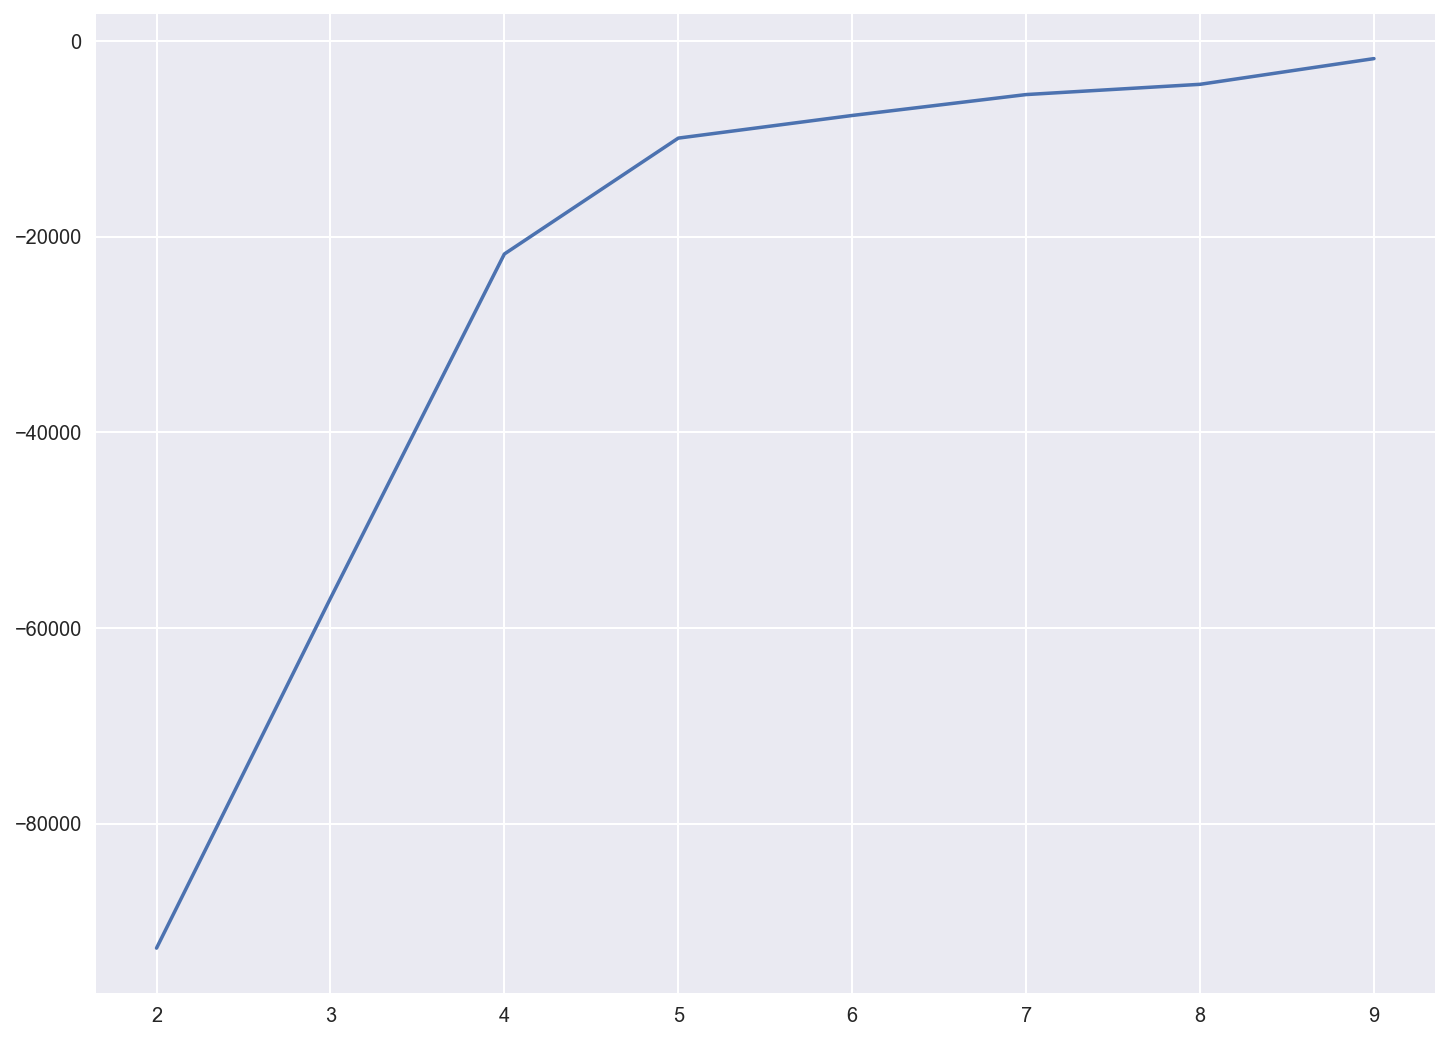

In [15]:
plt.plot(ks[1:], diff)

In [16]:
diff_r = diff[1:] / diff[:-1]

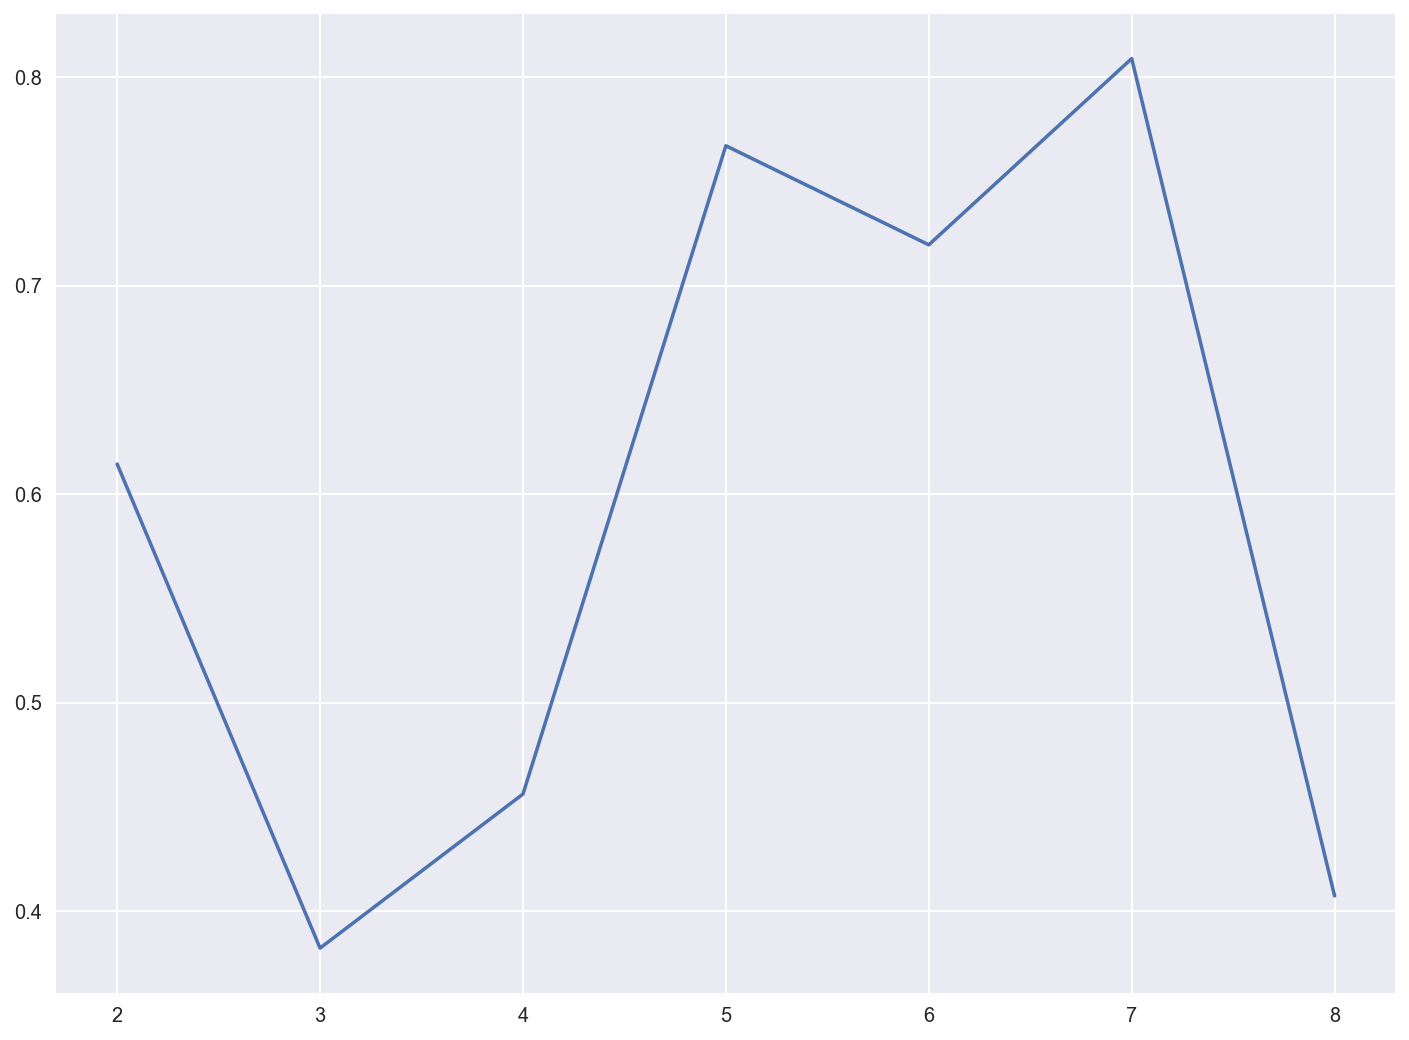

In [17]:
plt.plot(ks[1:-1], diff_r)

###### Таким образом, ортимальное число кластеров для разбиения = 3, но это явно не так, исходя из условия задачи. Административных округов в Москве 10. По графику виден близкий минимум в точке 8 кластеров.  

In [29]:
km = KMeans(n_clusters=10, init='k-means++')

In [30]:
%%time
predictions = km.fit_predict(X_scaled)

Wall time: 2.06 s


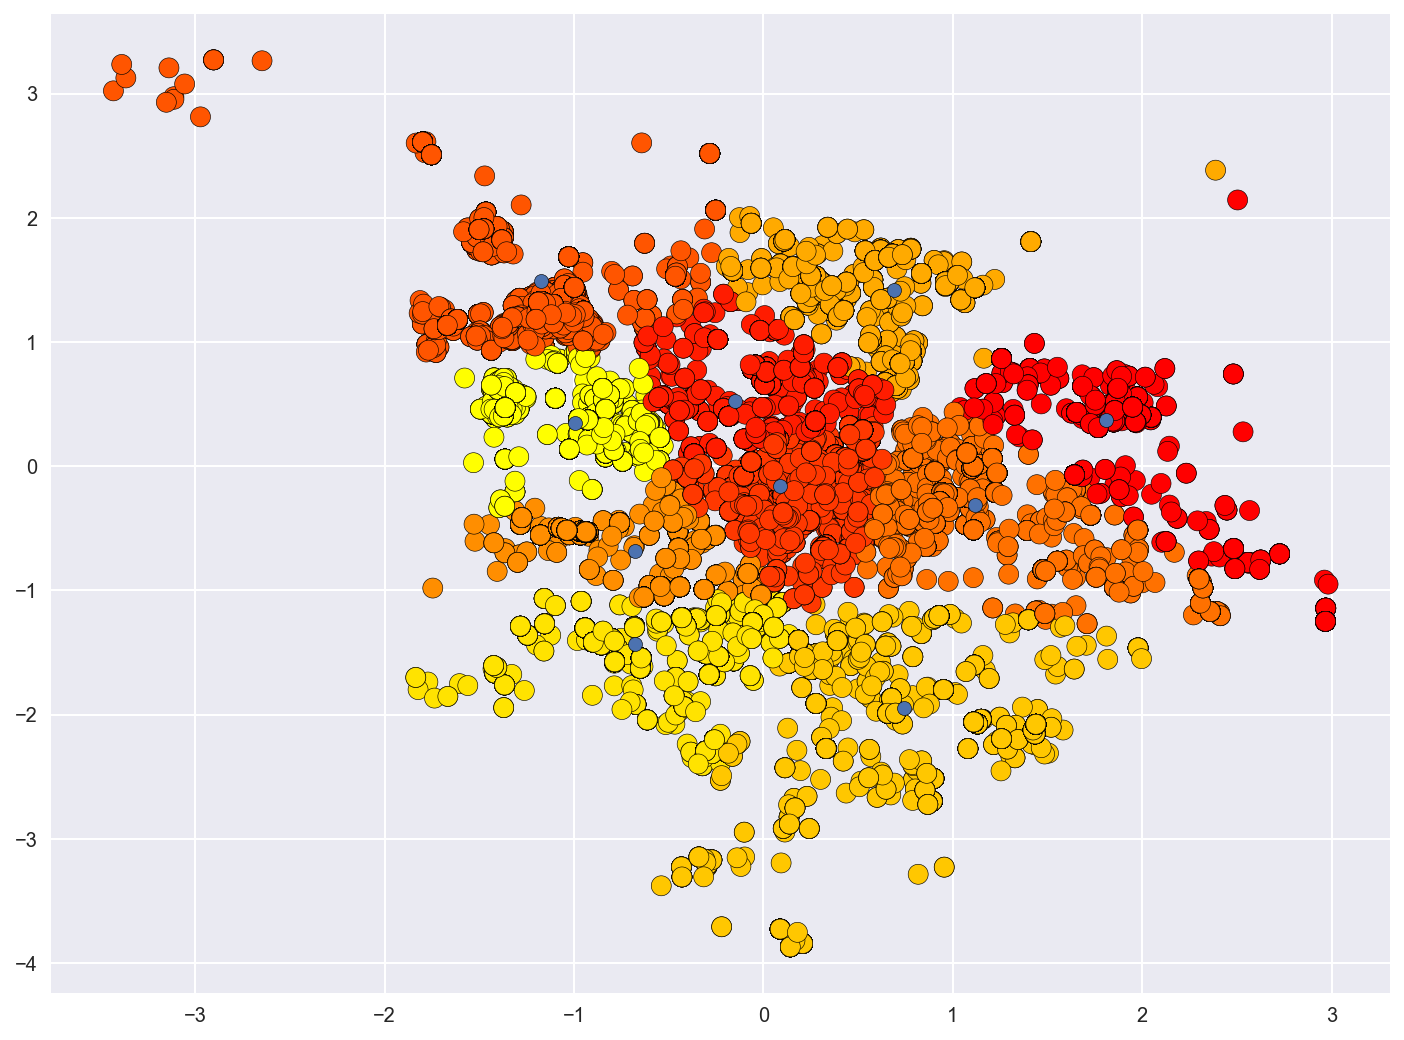

In [31]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predictions, cmap='autumn' , s=100, edgecolors='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], cmap='winter', edgecolors='black')

In [32]:
geo_data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [46]:
yes = geo_data[geo_data['comment_class'] == 1]
no = geo_data[geo_data['comment_class'] == -1]

In [50]:
X_yes = yes[['x', 'y']]
X_no = no[['x', 'y']]

In [52]:
X_yes_scaled = scaler.fit_transform(X_yes)
X_no_scaled = scaler.fit_transform(X_no)

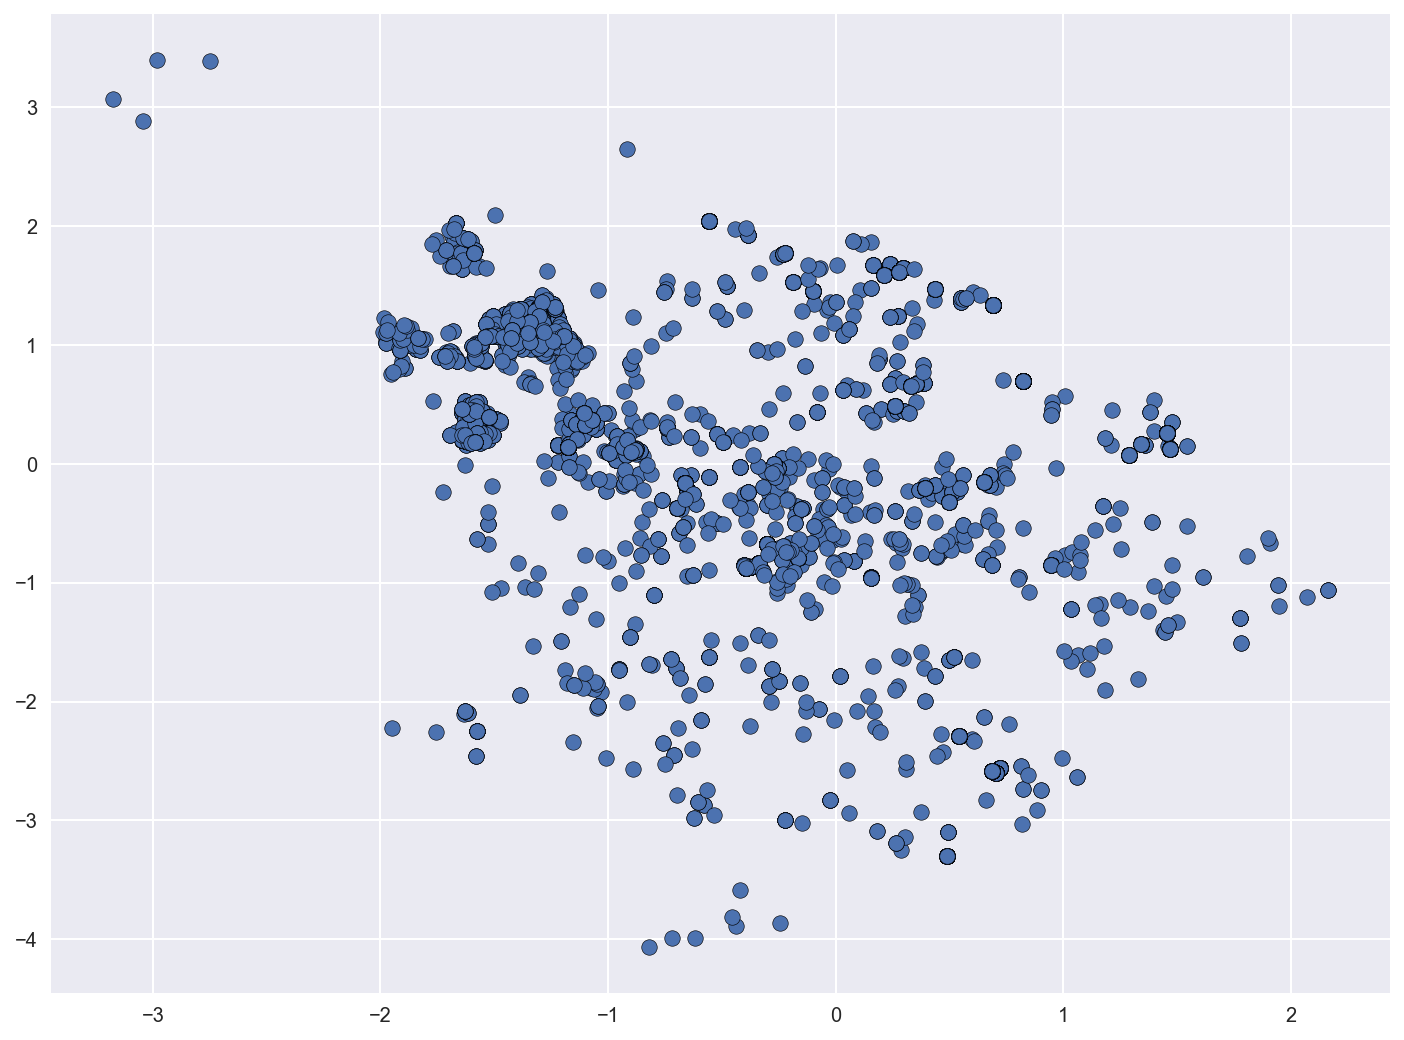

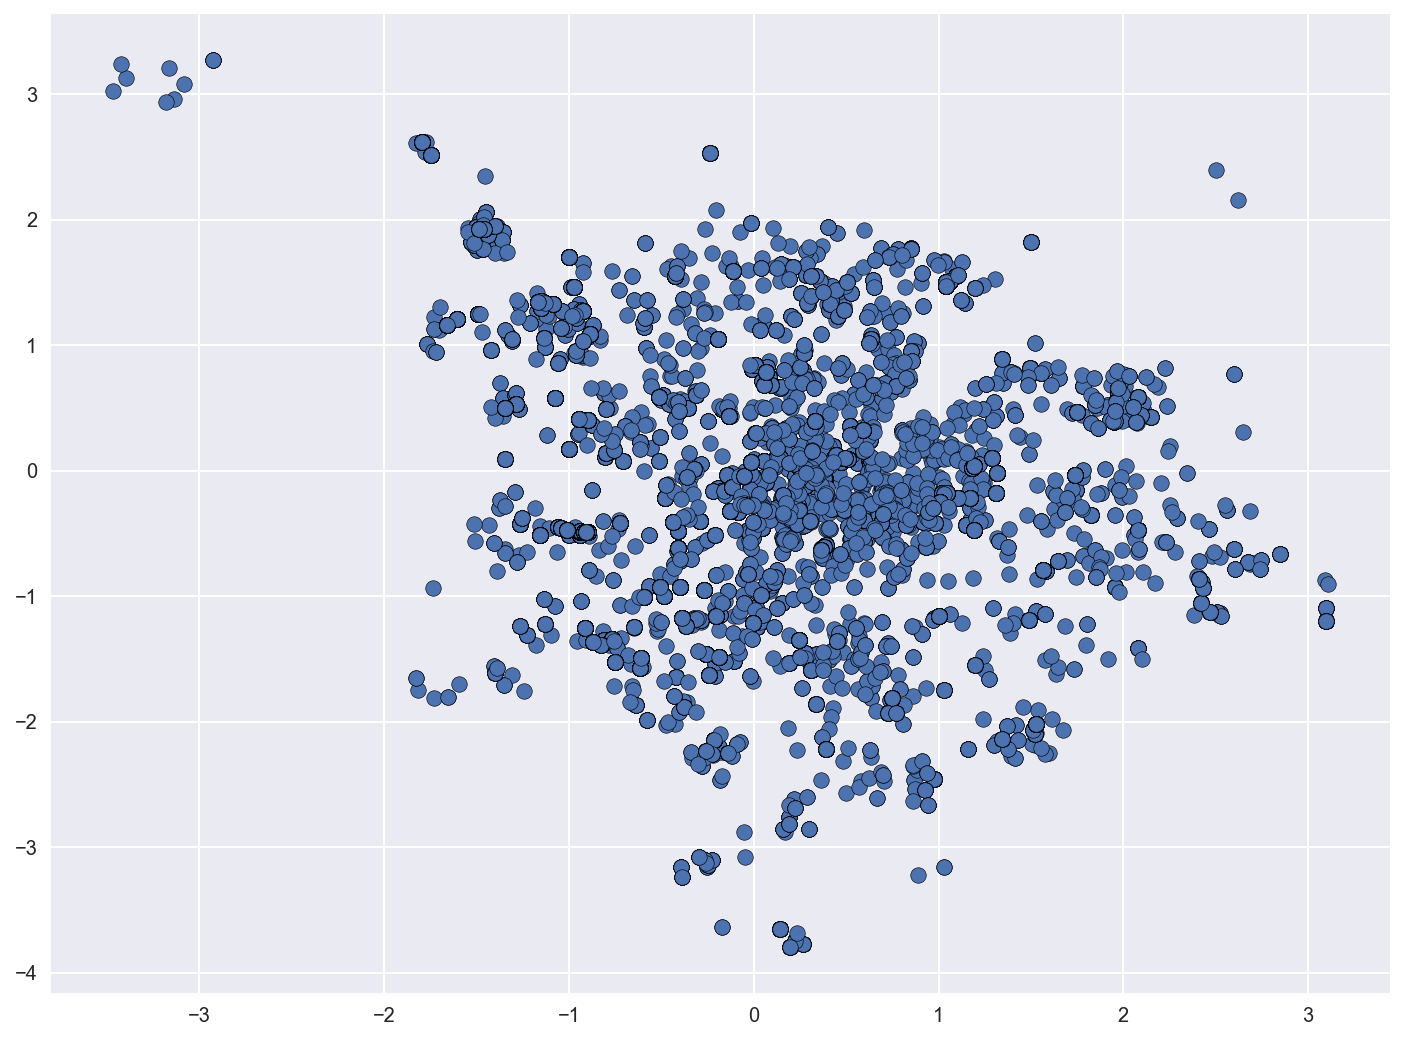

In [67]:
plt.scatter(X_yes_scaled[:, 0], X_yes_scaled[:, 1], cmap='summer', s=60, edgecolors='black')
plt.figure()
plt.scatter(X_no_scaled[:, 0], X_no_scaled[:, 1], cmap='winter', s=60, edgecolors='black')

In [79]:
km_1 = KMeans(n_clusters=10, init='k-means++')

In [80]:
%%time
predictions_yes = km_1.fit_predict(X_yes_scaled)
predictions_no = km_1.fit_predict(X_no_scaled)

Wall time: 2.03 s


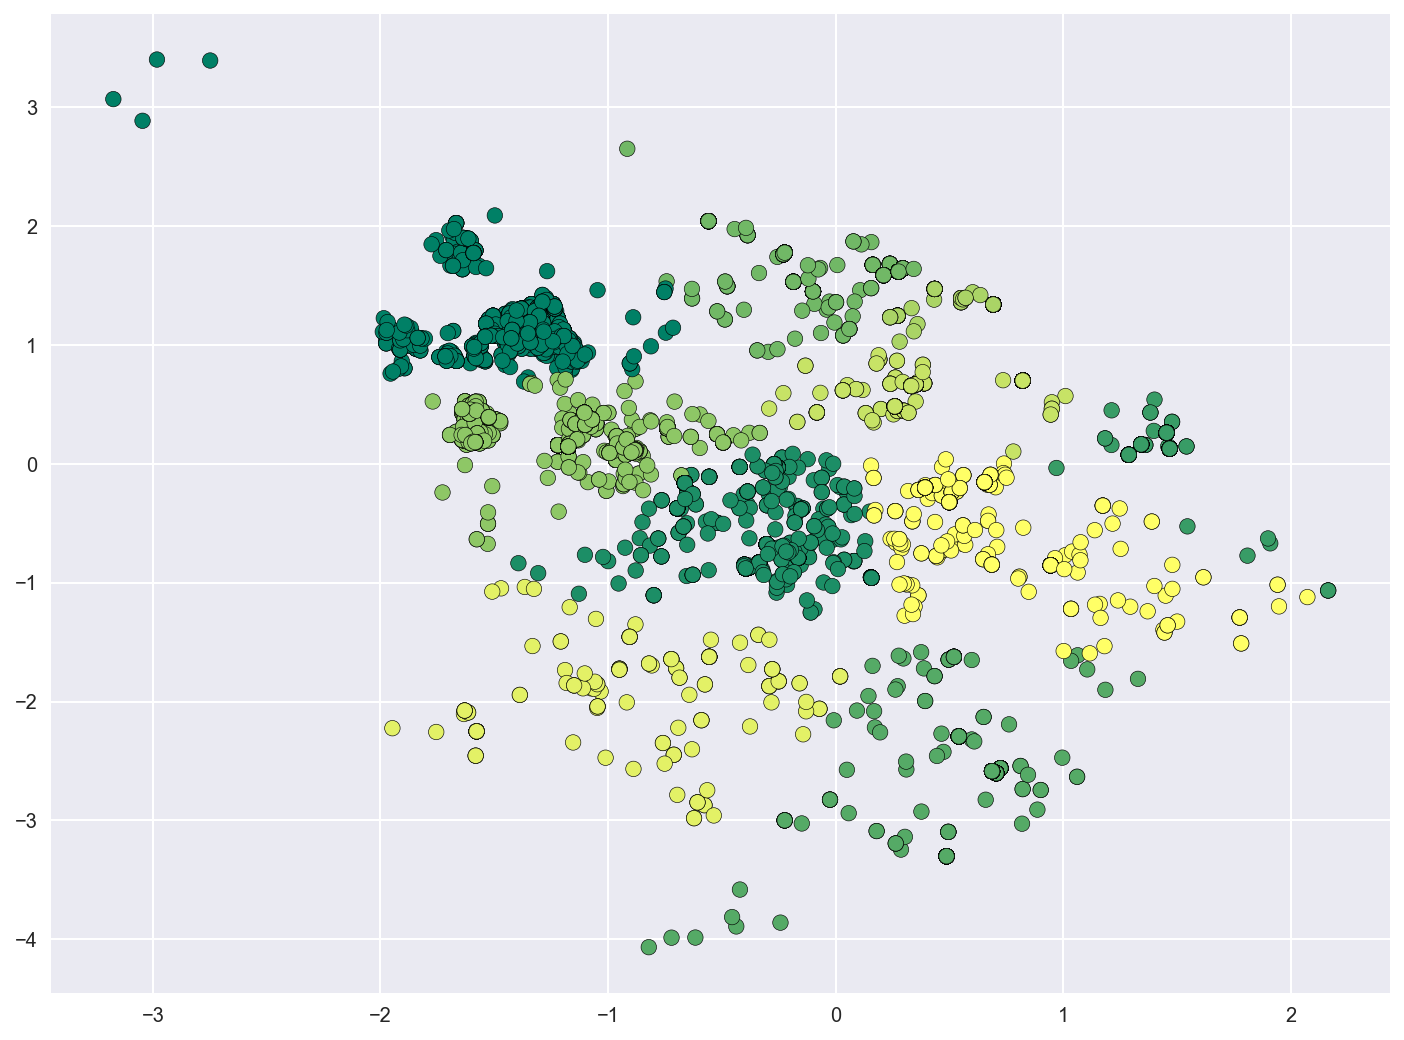

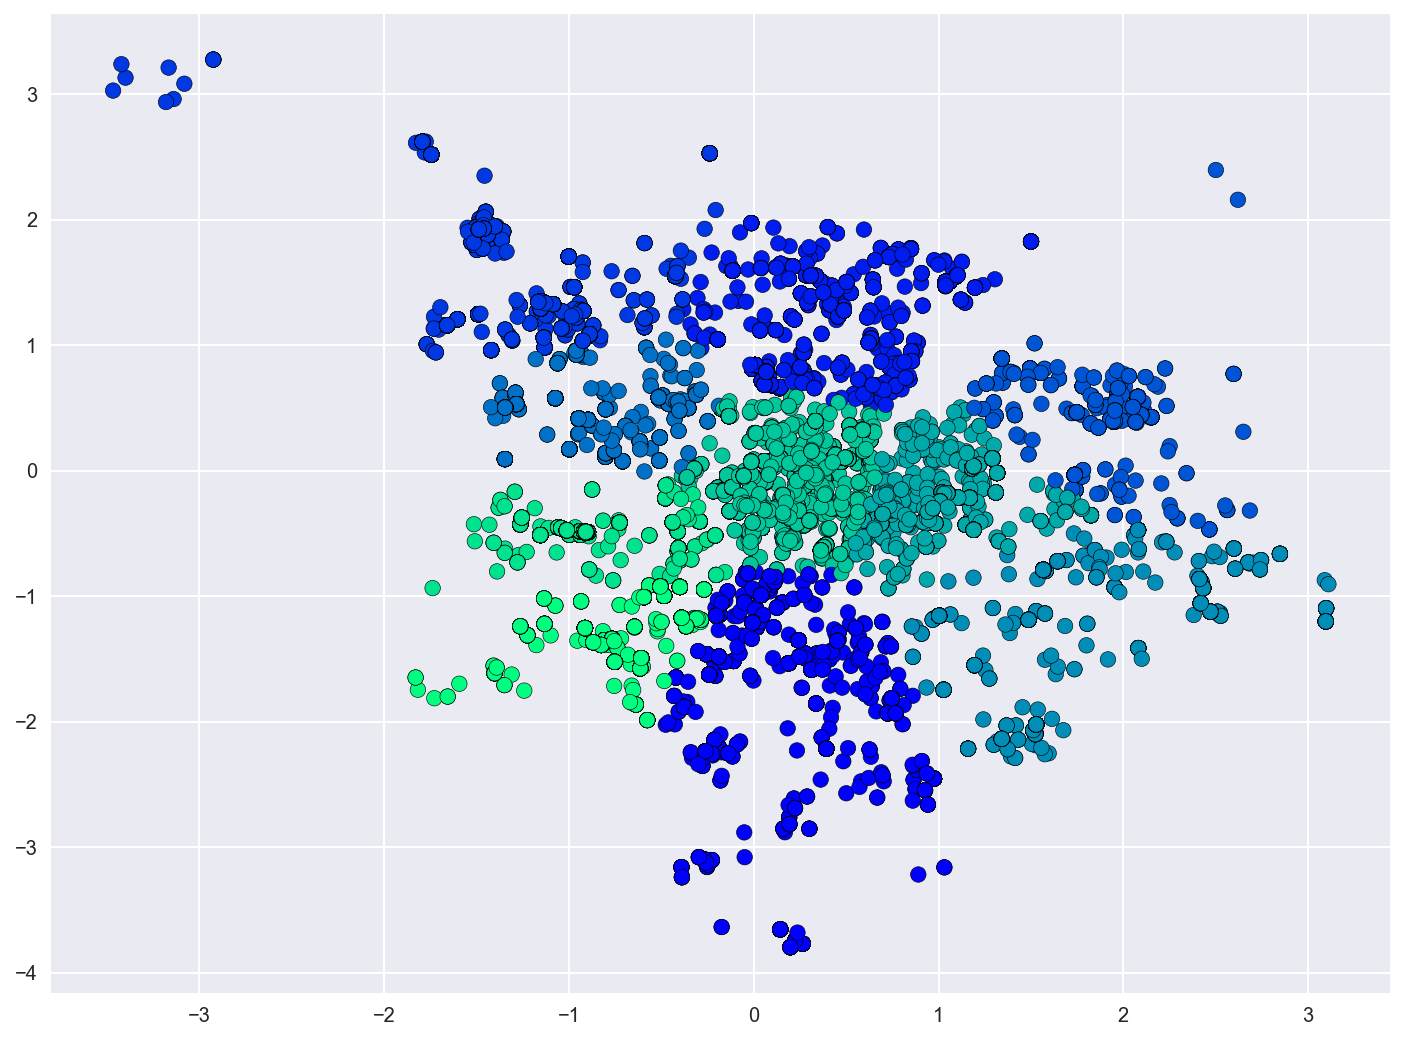

In [81]:
plt.scatter(X_yes_scaled[:, 0], X_yes_scaled[:, 1], c=predictions_yes, cmap='summer', s=60, edgecolors='black')
plt.figure()
plt.scatter(X_no_scaled[:, 0], X_no_scaled[:, 1], c=predictions_no, cmap='winter', s=60, edgecolors='black')

###### Пробовал использовать другие алгоритмы, хотя согласно рекомендациям по исползованию алгоритмов Kmeans для данной ситуации наиболее подходящий
DBSCAN 'вешает' систему

AffinityPropagation и AgglomerativeClustering выдают ошибку памяти

Аналогично ошибку памяти выдает оценка 
